In [1]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt 
import numpy as np
import scipy as sp
import scipy.ndimage.filters
from scipy import signal
from PIL import Image
from PIL import ImageFilter
from scipy import signal
# from SimpleCV import Camera

In [88]:
# im = Image.new("RGB", (512, 512), "white")
# arr = np.asarray(Image.open('Images/Q1/lena.jpg').convert('L'))
arr = np.array([[4,1,6,1,3], [3,2,7,7,2], [2,5,7,3,7], [1,4,7,1,3], [0,1,6,4,4]])
img = Image.fromarray(arr.astype('uint8'))

array([[4, 1, 6, 1, 3],
       [3, 2, 7, 7, 2],
       [2, 5, 7, 3, 7],
       [1, 4, 7, 1, 3],
       [0, 1, 6, 4, 4]], dtype=uint8)

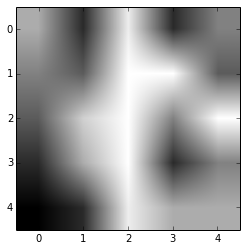

In [4]:
# img.save("output.png")
%matplotlib inline
imshow(np.asarray(img), cmap="Greys_r")
np.asarray(img)
# img.save("q1_origional.png", cmap="Greys_r")

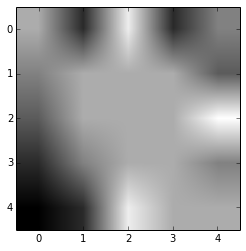

In [5]:
mean = ImageFilter.Kernel((3, 3),(1/9.0,1/9.0,1/9.0,1/9.0,1/9.0,1/9.0,1/9.0,1/9.0,1/9.0) ) 
im_fltd = img.filter(mean)
%matplotlib inline
imshow(np.asarray(im_fltd), cmap="Greys_r")

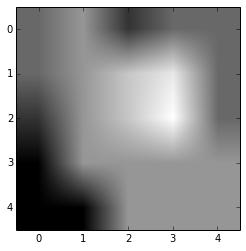

In [6]:
median = img.filter(ImageFilter.MedianFilter(size=3)) 
# im_fltd = img.filter(median)
%matplotlib inline
imshow(np.asarray(median), cmap="Greys_r")

In [ ]:
# Part 3

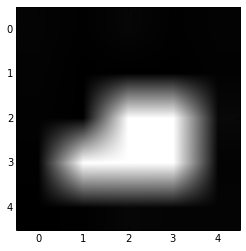

In [31]:
#sobel mask -> (-1,-2,-1,0,0,0,1,2,1)
def sobel(img):
    sobelx = ImageFilter.Kernel((3, 3), (-1,-2,-1,0,0,0,1,2,1))
    sobely = ImageFilter.Kernel((3, 3), (1,0,-1,2,0,-2,1,0,-1))
    im_fltdx = img.filter(sobelx)
    im_fltdy = img.filter(sobely)
    return im_fltdx,im_fltdy

im_fltdx, im_fltdy = sobel(img)
%matplotlib inline
Gx = np.asarray(im_fltdx)
Gy = np.asarray(im_fltdy)
imshow(Gx, cmap="Greys_r")
# how to find direction? double sobel? or + or - sign?

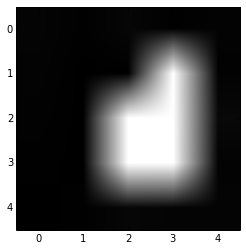

In [29]:
%matplotlib inline
imshow(Gy, cmap="Greys_r")

In [33]:
import math
print np.asarray(Gx), "\n"
print np.asarray(Gy)
midX = Gx[len(Gx)/2][len(Gx[0])/2]
midY = Gy[len(Gy)/2][len(Gy[0])/2]
mag = math.sqrt(midX**2 + midY**2) 
direct = math.degrees(math.atan2(midY,midX))
print "mag: {0}, dir: {1}".format(mag, direct)

[[  4   1   6   1   3]
 [  3   0   0   0   2]
 [  2   0 255 255   7]
 [  1 255 255 255   3]
 [  0   1   6   4   4]] 

[[  4   1   6   1   3]
 [  3   0   0 255   2]
 [  2   0 255 255   7]
 [  1   0 255 255   3]
 [  0   1   6   4   4]]
mag: 360.624458405, dir: 45.0


In [ ]:
# Sobel Sanity Check

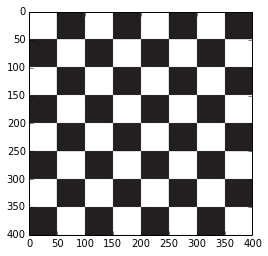

In [26]:
%matplotlib inline
im = Image.open('Images/Q1/checkers.jpg')
imshow(np.asarray(im))

In [34]:
def identity(img):
    ident = ImageFilter.Kernel((3, 3), (0,0,0,0,1,0,0,0,0))
    im_fltd = img.filter(ident)
    return im_fltd

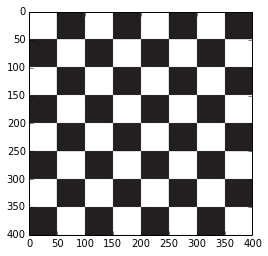

In [35]:
check = identity(im)
%matplotlib inline
imshow(np.asarray(check))

In [ ]:
Need help with part 4 understanding

In [ ]:
# Part 5

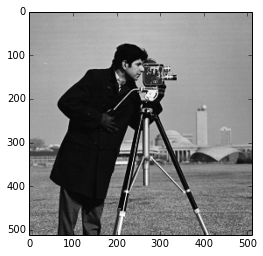

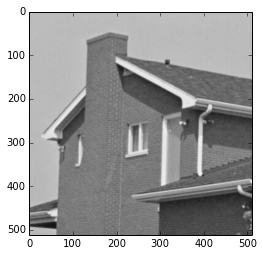

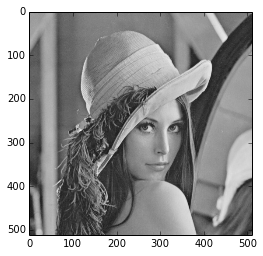

In [5]:
cameraman = Image.open('Images/Q1/cameraman.jpg')
house = Image.open('Images/Q1/house.jpg')
lena = Image.open('Images/Q1/lena.jpg')
%matplotlib inline
plt.figure()
plt.imshow(np.asarray(cameraman))
plt.figure()
plt.imshow(np.asarray(house))
plt.figure()
plt.imshow(np.asarray(lena))

In [31]:
def gSmooth1(img):
    return sp.ndimage.filters.gaussian_filter(img, 0.75)
    

def gSmooth2(img):
     return sp.ndimage.filters.gaussian_filter(img, 5.5)
    
def unsharp1(img):
    return 2*img- gSmooth1(img)

def unsharp2(img):
    return 2*img- gSmooth2(img)

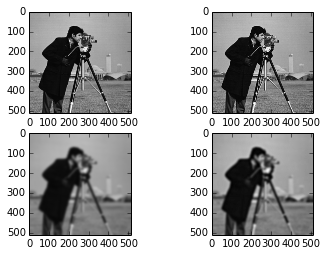

In [37]:
def smooth_sharp(img):
    simg1 = gSmooth1(img)
    uimg1 = unsharp1(simg1)

    simg2 = gSmooth2(img)
    uimg2 = unsharp2(simg2)

    %matplotlib inline
    plt.figure()
    plt.subplot(2,2,1)
    plt.imshow(simg1)
    plt.subplot(2,2,2)
    plt.imshow(uimg1)
    plt.subplot(2,2,3)
    plt.imshow(simg2)
    plt.subplot(2,2,4)
    plt.imshow(uimg2)
    
smooth_sharp(house)
smooth_sharp(cameraman)


[[[188 188 188]
  [188 188 188]
  [187 187 187]
  ..., 
  [189 189 189]
  [189 189 189]
  [189 189 189]]

 [[189 189 189]
  [188 188 188]
  [187 187 187]
  ..., 
  [189 189 189]
  [189 189 189]
  [189 189 189]]

 [[188 188 188]
  [188 188 188]
  [187 187 187]
  ..., 
  [189 189 189]
  [189 189 189]
  [189 189 189]]

 ..., 
 [[186 186 186]
  [187 187 187]
  [187 187 187]
  ..., 
  [109 109 109]
  [149 149 149]
  [163 163 163]]

 [[185 185 185]
  [186 186 186]
  [186 186 186]
  ..., 
  [110 110 110]
  [148 148 148]
  [163 163 163]]

 [[185 185 185]
  [186 186 186]
  [186 186 186]
  ..., 
  [110 110 110]
  [147 147 147]
  [161 161 161]]]


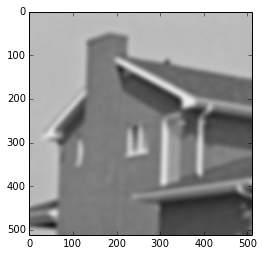

In [17]:
sHouse1 = gSmooth1(cameraman)
usHouse1 = unsharp1(sHouse1)

sHouse2 = gSmooth2(cameraman)
usHouse2 = unsharp2(sHouse2)

%matplotlib inline
plt.figure()
plt.imshow(sHouse1)
plt.figure()
plt.imshow(usHouse1)
plt.figure()
plt.imshow(sHouse2)
plt.figure()
plt.imshow(usHouse2)

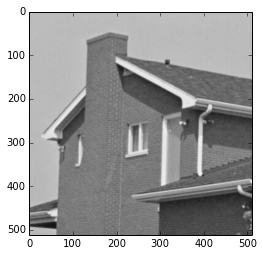

In [18]:
%matplotlib inline
imshow(np.asarray(house))

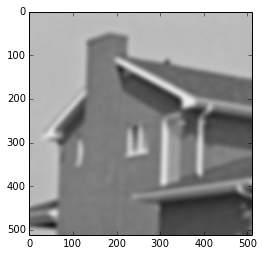

In [19]:
%matplotlib inline
imshow(unsharp(sHouse))

In [ ]:
%matplotlib inline
imshow(unsharp(house))

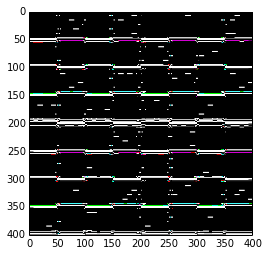

In [27]:
x,y = sobel(im)
%matplotlib inline
imshow(np.asarray(x))

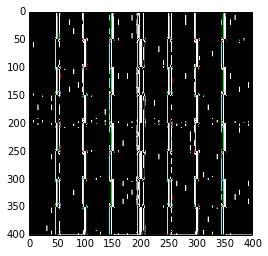

In [28]:
%matplotlib inline
imshow(np.asarray(y))